In [ ]:
# module import
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
# 경로 설정
root_path = "/content/drive/My Drive/멀티캠퍼스/[혁신성장] 인공지능 자연어처리 기반/[강의]/조성현 강사님"
data_path = f"{root_path}/dataset"

In [ ]:
# 데이터 로드
with open(f"{data_path}/mnist.pickle", 'rb') as f:
    mnist = pickle.load(f)

In [ ]:
# 데이터 확인
dir(mnist)

['DESCR', 'categories', 'data', 'details', 'feature_names', 'target', 'url']

# _1_. 오토인코더 모델 생성

In [ ]:
# input data: 3000개만 사용
X_data = mnist.data[:3000]
X_image = X_input.copy() # 그림 그려 보는 용도
X_target = mnist.target[:3000] # 확인용

In [ ]:
# 데이터 픽셀 표준화
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data.T).T # 표준화 방향 주의

In [ ]:
# 노드 설정
X_input.shape # 784 차원 벡터 3000개(이미지 개수)
n_input = X_input.shape[1]
n_feature = int(input('축소할 차원 수 설정: ')) # 784 feature를 이만큼으로 줄인다.
n_output = n_input # 입력과 출력 같음

축소할 차원 수 설정: 100


In [ ]:
# 그래프 모델 생성
x_Input = Input(batch_shape=(None, n_input))
x_Encoder = Dense(256, activation='relu')(x_Input) # 인코더 1층
# x_Encoder = Dense(n_feature, activation='relu')(x_Encoder) # 인코더 2층
x_Encoder = Dense(n_feature, activation='relu')(x_Encoder) # 인코더 2층
e_latent = Dense(10*10, activation='linear')(x_Encoder) # 여기서 축소. 최종 : 여기 바뀌었다 조심!!!!!! 비교만 해보려구!
y_Decoder = Dense(256, activation='relu')(e_latent) # 디코더 1층
y_Decoder = Dense(n_output, activation='linear')(y_Decoder) # 디코더 2층

model = Model(x_Input, y_Decoder)
model.compile(loss='mse', optimizer=Adam(lr=0.01))
print("====== AutoEncoder 모델: 전체 구조 ======")
print(model.summary())

====== AutoEncoder 모델: 전체 구조 ======
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_29 (Dense)             (None, 100)               25700     
_________________________________________________________________
dense_31 (Dense)             (None, 256)               25856     
_________________________________________________________________
dense_32 (Dense)             (None, 784)               201488    
Total params: 454,004
Trainable params: 454,004
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# autoencoder 학습
EPOCHS = int(input('학습 횟수 설정: '))
BATCH = int(input('배치 사이즈 설정: '))
ae_hist = model.fit(X_data, X_data, epochs=EPOCHS, batch_size=BATCH)

학습 횟수 설정: 500
배치 사이즈 설정: 300
Epoch 1/500
10/10 [==============================] - 0s 25ms/step - loss: 0.9955
Epoch 2/500
10/10 [==============================] - 0s 24ms/step - loss: 0.6717
Epoch 3/500
10/10 [==============================] - 0s 22ms/step - loss: 0.6448
Epoch 4/500
10/10 [==============================] - 0s 22ms/step - loss: 0.6359
Epoch 5/500
10/10 [==============================] - 0s 23ms/step - loss: 0.6166
Epoch 6/500
10/10 [==============================] - 0s 21ms/step - loss: 0.5804
Epoch 7/500
10/10 [==============================] - 0s 22ms/step - loss: 0.5563
Epoch 8/500
10/10 [==============================] - 0s 21ms/step - loss: 0.5382
Epoch 9/500
10/10 [==============================] - 0s 23ms/step - loss: 0.5265
Epoch 10/500
10/10 [==============================] - 0s 21ms/step - loss: 0.5167
Epoch 11/500
10/10 [==============================] - 0s 21ms/step - loss: 0.5102
Epoch 12/500
10/10 [==============================] - 0s 22ms/step - loss: 0.5

latent feature 뽑아서 그림 그려 보자.

In [ ]:
# encoder = Model(x_Input, x_Encoder)
encoder = Model(x_Input, e_latent)
print("====== AutoEncoder 모델: 인코더 부분 ======")
print(encoder.summary())

====== AutoEncoder 모델: 인코더 부분 ======
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_29 (Dense)             (None, 100)               25700     
_________________________________________________________________
dense_30 (Dense)             (None, 100)               10100     
Total params: 236,760
Trainable params: 236,760
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
mnist_latent = encoder.predict(X_data)
mnist_latent.shape

(3000, 100)

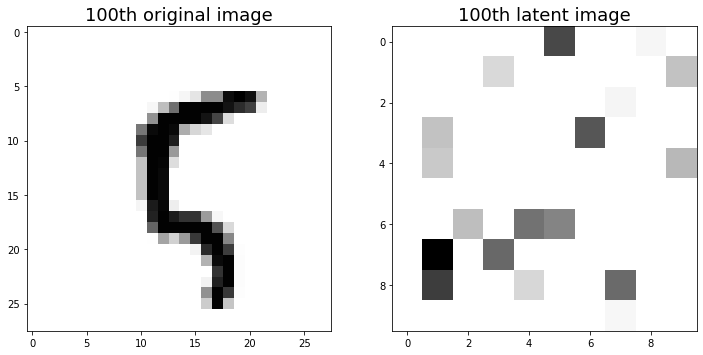

In [ ]:
sample_num = 100

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.imshow(X_image[sample_num].reshape(28, 28), cmap='Greys')
ax1.set_title('100th original image', size=18)
ax2.imshow(mnist_latent[sample_num].reshape(10, 10), cmap='Greys')
ax2.set_title('100th latent image', size=18)

plt.show()

위와 비교하기 위해 새로 진행


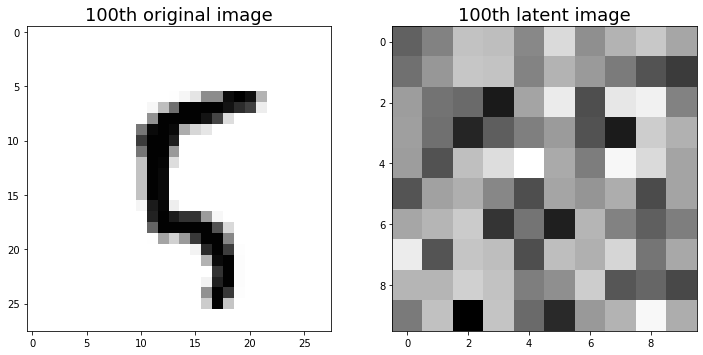

In [ ]:
sample_num = 100

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.imshow(X_image[sample_num].reshape(28, 28), cmap='Greys')
ax1.set_title('100th original image', size=18)
ax2.imshow(mnist_latent[sample_num].reshape(10, 10), cmap='Greys')
ax2.set_title('100th latent image', size=18)

plt.show()

# _2_. Kmeans 군집화: 10그룹


In [ ]:
# Kmeans++ 알고리즘
km = KMeans(n_clusters=10, init='k-means++', n_init=3, max_iter=300, tol=1e-04, random_state=42, verbose=1)
km.fit(mnist_latent)
clust = km.predict(mnist_latent)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 42847.145
start iteration
done sorting
end inner loop
Iteration 1, inertia 40642.1
start iteration
done sorting
end inner loop
Iteration 2, inertia 40235.54
start iteration
done sorting
end inner loop
Iteration 3, inertia 40117.152
start iteration
done sorting
end inner loop
Iteration 4, inertia 40062.47
start iteration
done sorting
end inner loop
Iteration 5, inertia 40040.277
start iteration
done sorting
end inner loop
Iteration 6, inertia 40029.086
start iteration
done sorting
end inner loop
Iteration 7, inertia 40023.59
start iteration
done sorting
end inner loop
Iteration 8, inertia 40021.133
start iteration
done sorting
end inner loop
Iteration 9, inertia 40019.668
start iteration
done sorting
end inner loop
Iteration 10, inertia 40019.453
start iteration
done sorting
end inner loop
Iteration 11, inertia 40018.875
start iteration
done sorting
end inner loop
Iteration 12, inertia 40018.05
star

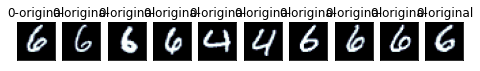

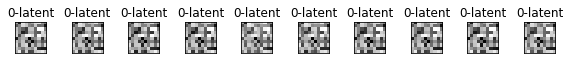

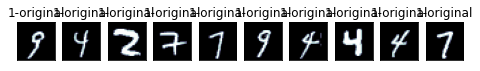

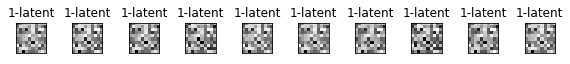

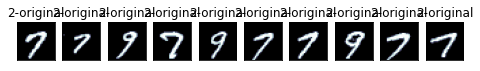

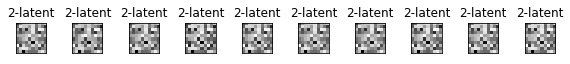

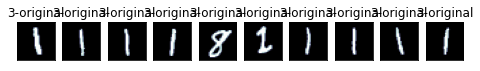

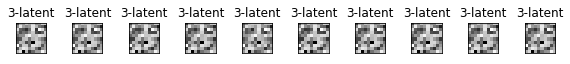

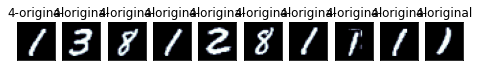

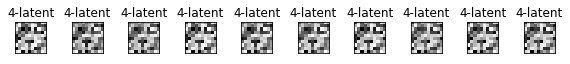

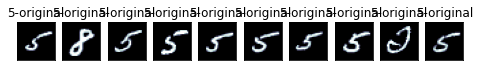

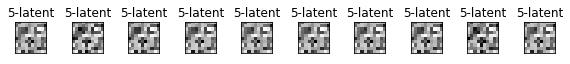

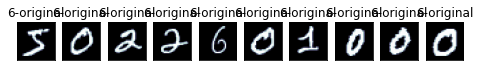

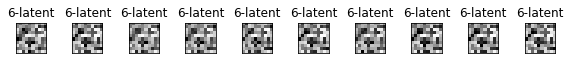

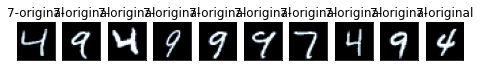

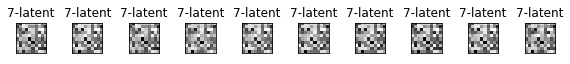

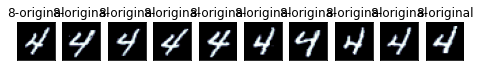

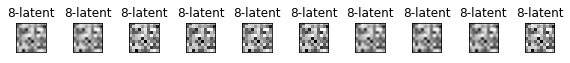

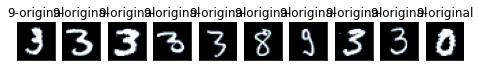

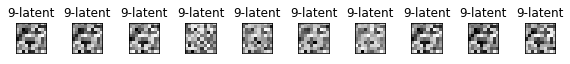

In [ ]:
# 클러스터별 이미지 확인
for k in np.unique(clust):
    # 클러스터가 k인 이미지 10개를 찾는다.
    idx = np.where(clust == k)[0][:10]

    f1 = plt.figure(figsize=(8, 2)) # 원래 이미지
    f2 = plt.figure(figsize=(8, 2)) # latent vector
    for i in range(10):
        image = X_image[idx[i]].reshape(28, 28)        
        ax1 = f1.add_subplot(1, 10, i+1)
        ax1.imshow(image, cmap=plt.cm.bone)
        ax1.grid(False)
        ax1.set_title(f"{k}-original")
        ax1.xaxis.set_ticks([])
        ax1.yaxis.set_ticks([])

        image_latent = mnist_latent[idx[i]].reshape(10, 10)
        ax2 = f2.add_subplot(1, 10, i+1)        
        ax2.imshow(image_latent, cmap='Greys')        
        ax2.grid(False)
        ax2.set_title(f"{k}-latent")
        ax2.xaxis.set_ticks([])
        ax2.yaxis.set_ticks([])

        plt.tight_layout()

# _3_. 전체 과정 activation sigmoid로 변경

축소할 차원 수 설정: 100
====== AutoEncoder 모델: 전체 구조 ======
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_22 (Dense)             (None, 100)               25700     
_________________________________________________________________
dense_23 (Dense)             (None, 256)               25856     
_________________________________________________________________
dense_24 (Dense)             (None, 784)               201488    
Total params: 454,004
Trainable params: 454,004
Non-trainable params: 0
_________________________________________________________________
None
학습 횟수 설정: 500
배치 사이즈 설정: 100
Epoch 1/500
30/30 [=============

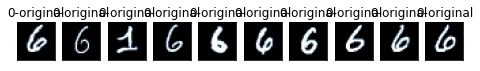

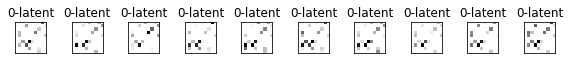

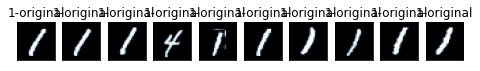

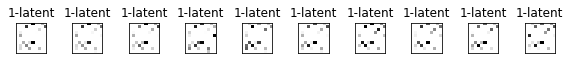

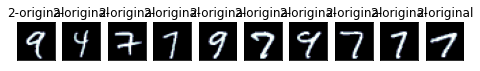

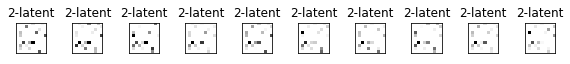

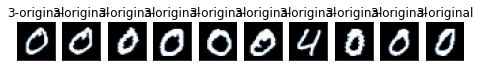

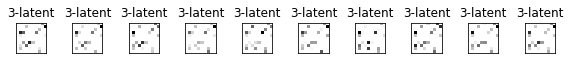

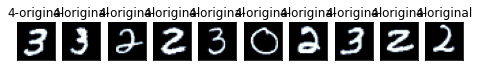

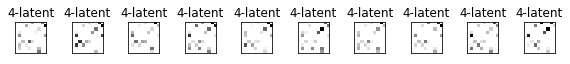

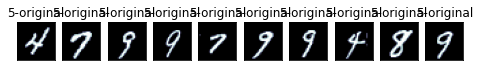

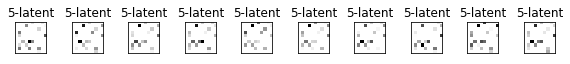

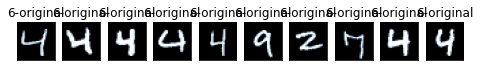

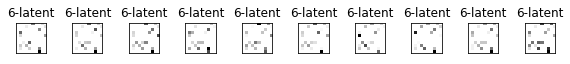

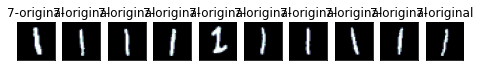

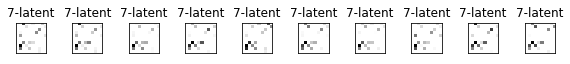

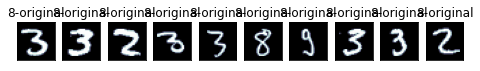

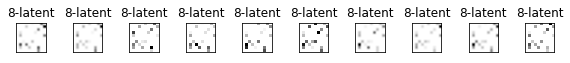

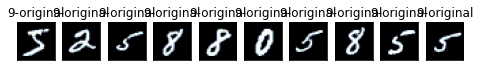

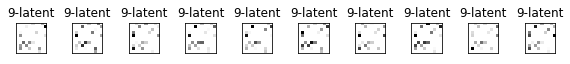

In [ ]:
# input data: 3000개만 사용
X_data = mnist.data[:3000]
X_image = X_input.copy() # 그림 그려 보는 용도
X_target = mnist.target[:3000] # 확인용

# 데이터 픽셀 표준화
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data.T).T # 표준화 방향 주의

# 노드 설정
X_input.shape # 784 차원 벡터 3000개(이미지 개수)
n_input = X_input.shape[1]
n_feature = int(input('축소할 차원 수 설정: ')) # 784 feature를 이만큼으로 줄인다.
n_output = n_input # 입력과 출력 같음

# 그래프 모델 생성
x_Input = Input(batch_shape=(None, n_input))
x_Encoder = Dense(256, activation='sigmoid')(x_Input) # 인코더 1층
x_Encoder = Dense(n_feature, activation='sigmoid')(x_Encoder) # 인코더 2층
y_Decoder = Dense(256, activation='sigmoid')(x_Encoder) # 디코더 1층
y_Decoder = Dense(n_output, activation='linear')(y_Decoder) # 디코더 2층

model = Model(x_Input, y_Decoder)
model.compile(loss='mse', optimizer=Adam(lr=0.01))
print("====== AutoEncoder 모델: 전체 구조 ======")
print(model.summary())

# autoencoder 학습
EPOCHS = int(input('학습 횟수 설정: '))
BATCH = int(input('배치 사이즈 설정: '))
ae_hist = model.fit(X_data, X_data, epochs=EPOCHS, batch_size=BATCH)

# latent feature
encoder = Model(x_Input, x_Encoder)
print("====== AutoEncoder 모델: 인코더 부분 ======")
print(encoder.summary())

# 군집화
# Kmeans++ 알고리즘
km = KMeans(n_clusters=10, init='k-means++', n_init=3, max_iter=300, tol=1e-04, random_state=42, verbose=1)
km.fit(mnist_latent)
clust = km.predict(mnist_latent)

# 클러스터별 이미지 확인
for k in np.unique(clust):
    # 클러스터가 k인 이미지 10개를 찾는다.
    idx = np.where(clust == k)[0][:10]

    f1 = plt.figure(figsize=(8, 2)) # 원래 이미지
    f2 = plt.figure(figsize=(8, 2)) # latent vector
    for i in range(10):
        image = X_image[idx[i]].reshape(28, 28)        
        ax1 = f1.add_subplot(1, 10, i+1)
        ax1.imshow(image, cmap=plt.cm.bone)
        ax1.grid(False)
        ax1.set_title(f"{k}-original")
        ax1.xaxis.set_ticks([])
        ax1.yaxis.set_ticks([])

        image_latent = mnist_latent[idx[i]].reshape(10, 10)
        ax2 = f2.add_subplot(1, 10, i+1)        
        ax2.imshow(image_latent, cmap='Greys')        
        ax2.grid(False)
        ax2.set_title(f"{k}-latent")
        ax2.xaxis.set_ticks([])
        ax2.yaxis.set_ticks([])

        plt.tight_layout()